# Forelesning 3: Statistisk analyse

I denne forelesningen skal vi se på statistisk analyse og hvordan vi kan bruke data til å lage modeller.
- gjøre statistiske operasjoner på data (pandas og numpy)
- tolke statistiske størrelser og visualiseringer (som boksplott)
- gjøre og tolke regresjon (numpy)

<img src="https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/diverse/pingviner.png" width="500"/>
<img src="https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/diverse/pingvin.png" width="500"/>

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [90]:
pingviner = pd.read_csv("https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h21/datafiler/penguings.txt")
pingviner.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [96]:
luffelengde = pingviner["flipper_length_mm"]
gjennomsnitt = luffelengde.mean()
median = luffelengde.median()

In [98]:
pingviner.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [101]:
kons = [2,3,4,4,5,2,3,6]

snitt = np.mean(kons)
avvik = np.std(kons, ddof = 1)
# pandas: snitt = kons.mean()
avvik

1.407885953173359

In [104]:
kons2 = pd.Series(kons)
kons2.std()

1.407885953173359

In [106]:
fil = "https://www.uio.no/studier/emner/matnat/ifi/IN-KJM1900/h20/datafiler/vin.csv"

vin = pd.read_csv(fil)
vin.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [108]:
pH = vin["pH"]
snitt_pH = pH.mean()
avvik_pH = pH.std()

print(f"pH-en er: {snitt_pH:.2f} +- {avvik_pH:.2f}")

pH-en er: 3.31 +- 0.15


In [117]:
Q1, Q2, Q3 = luffelengde.quantile([0.25, 0.50, 0.75])
IQR = Q3 - Q1
print(f"Luffelengde: {Q2} +- {IQR} mm")

Luffelengde: 197.0 +- 23.0 mm


<AxesSubplot: xlabel='quality', ylabel='alcohol'>

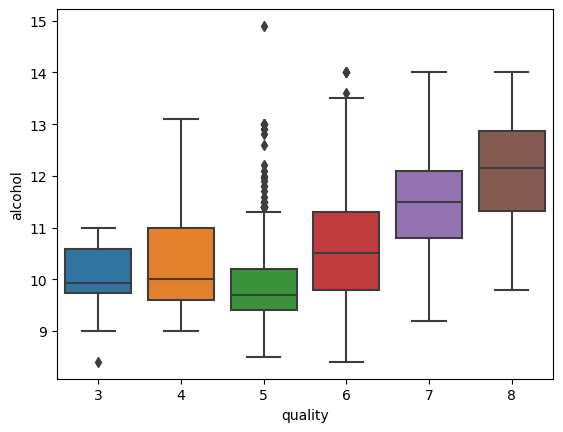

In [125]:
sns.boxplot(data = vin, x = "quality", y = "alcohol")

<AxesSubplot: >

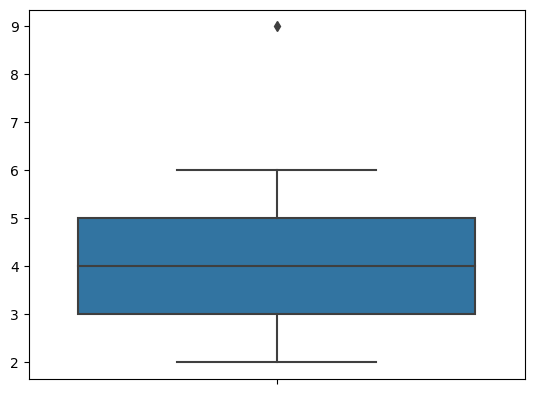

In [123]:
kons = [2,3,4,4,5,2,3,6,9]
sns.boxplot(y = kons)

## Regresjon

|     Temperatur (°C)     |     NH$_3$, løselighet     (g/100 mL H$_2$O)     |     NaCl, Løselighet      (g/100 mL H$_2$O)     |
|-------------------------|--------------------------------------------|----------------------------------------------|
|     0                   |     88.5                                   |     35.7                                     |
|     20                  |     56.0                                   |     35.9                                     |
|     40                  |     34.0                                   |     36.4                                     |
|     60                  |     20.0                                   |     37.1                                     |
|     80                  |     11.0                                   |     38.0                                     |
|     100                 |     7.0                                    |     39.2                                     |

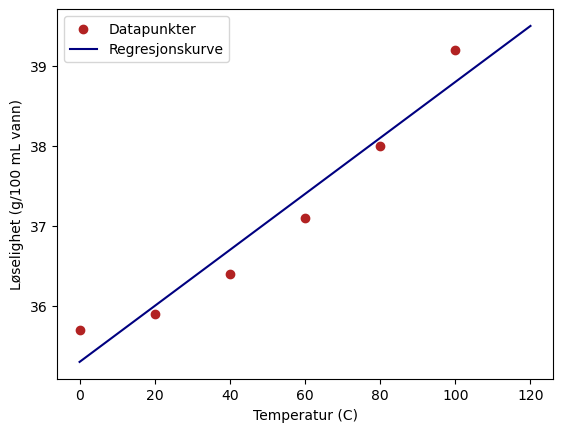

In [131]:
import numpy as np
import matplotlib.pyplot as plt

# La oss gjøre en regresjon
T = [0, 20, 40, 60, 80, 100]
sol_NaCl = [35.7, 35.9, 36.4, 37.1, 38, 39.2]

a, b = np.polyfit(T, sol_NaCl, 1)

x = np.linspace(0,120,1000)
y = a*x + b

plt.scatter(T, sol_NaCl, color = "firebrick", label = "Datapunkter")
plt.plot(x, y, color = "navy", label = "Regresjonskurve")
plt.xlabel("Temperatur (C)")
plt.ylabel("Løselighet (g/100 mL vann)")
plt.legend()
plt.show()

Menti: https://www.menti.com/2sikjeo4ga